In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
!pip install statsmodels


In [3]:
#Import the datasets
sub_df = pd.read_csv("submission_format.csv")
features_test = pd.read_csv("dengue_features_test.csv")
features_train = pd.read_csv("dengue_features_train.csv")
label_train = pd.read_csv("dengue_labels_train.csv")

 Reading the dataset
 

In [4]:
sub_df.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [5]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         416 non-null    object
 1   year         416 non-null    int64 
 2   weekofyear   416 non-null    int64 
 3   total_cases  416 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.1+ KB


In [6]:
features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [7]:
features_test.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.40,9.050,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.52,10.720,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.20,10.075,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.70,8.480,32.2,21.8,34.1
415,iq,2013,26,2013-06-25,0.339467,0.240071,0.356943,0.273600,51.80,297.372857,...,27.80,87.030000,51.80,16.148571,11.542857,27.35,9.675,32.6,22.0,14.9


In [8]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

In [9]:
features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [10]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [11]:
label_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [12]:
label_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [13]:
label_train["year"].value_counts()

2001    104
2007    104
2006    104
2005    104
2004    104
2003    104
2002    104
2000     78
2008     69
2009     52
1991     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1999     52
1990     35
2010     26
Name: year, dtype: int64

In [14]:
label_train["city"].value_counts()


sj    936
iq    520
Name: city, dtype: int64

Ploting the Year with maximum cases

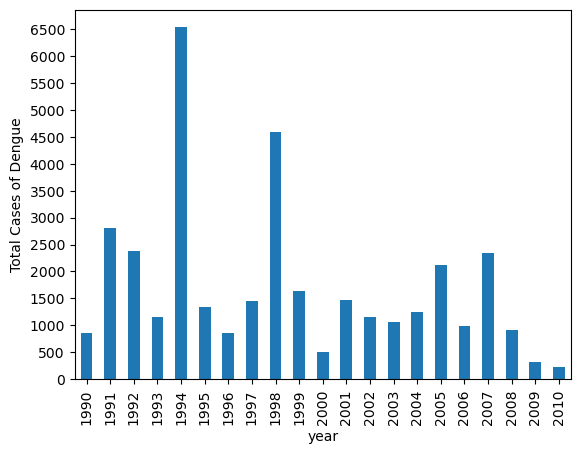

In [15]:
year_max_cases = label_train.groupby(['year'])['total_cases'].agg('sum')


year_max_cases.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('Total Cases of Dengue')
plt.yticks(np.arange(0,7000, step=500))
plt.show()

1994 has the maximum cases of dengue 

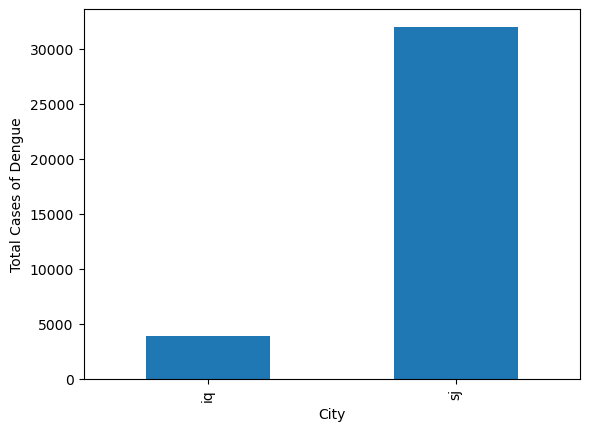

In [16]:
city_affected = label_train.groupby(['city'])['total_cases'].agg('sum')

city_affected.plot(kind='bar')
plt.rcParams['figure.figsize'] = [6, 5]
plt.xlabel('City')
plt.ylabel('Total Cases of Dengue')
plt.show()


San Juan has over 30000 cases 

In [17]:
features_train.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [18]:
features_train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [19]:
train_df = pd.merge(features_train, label_train)
     

In [20]:
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [22]:
train_df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [23]:
train_df.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [24]:
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


<AxesSubplot: xlabel='city', ylabel='Count'>

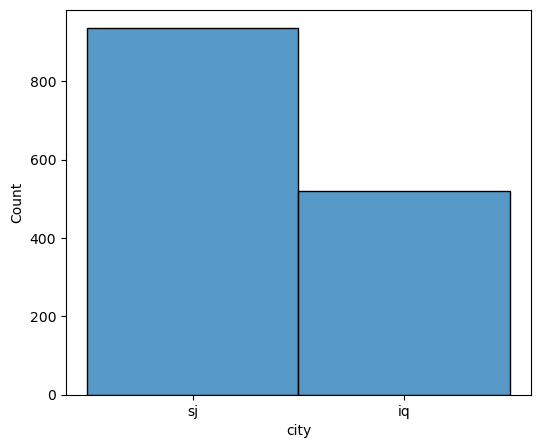

In [25]:
sns.histplot(train_df['city'])

#rename columns names

In [26]:
train_df = train_df.rename(columns={"weekofyear" : "week_of_year", 
                                   "ndvi_ne" : "northeast_of_city_centroid", "ndvi_nw" : "northwest_of_city_centroid",
                                   "ndvi_se" : "southeast_of_city_centroid", "ndvi_sw" : "southwest_of_city_centroid",
                                   "precipitation_amt_mm" : "Persian_total_precipitation", "reanalysis_air_temp_k" : "mean_air_temperature",
                                   "reanalysis_relative_humidity_percent" : "mean_relative_humidity", "reanalysis_sat_precip_amt_mm" : "Noaa_total_precipitation_per_mm",
                                   "reanalysis_specific_humidity_g_per_kg" : "mean_specific_humidity", "reanalysis_tdtr_k" : "diurnal_temp_range",
                                   "station_avg_temp_c" : "average_temp", "station_diur_temp_rng_c" : "diurnal_temp_range",
                                   "station_max_temp_c" : "maximum_temp", "station_min_temp_c" : "minimum_temp",
                                   "station_precip_mm" : "total_precipitation_weather_station"})

In [27]:
train_df.head()

,city,year,week_of_year,week_start_date,northeast_of_city_centroid,northwest_of_city_centroid,southeast_of_city_centroid,southwest_of_city_centroid,Persian_total_precipitation,mean_air_temperature,...,mean_relative_humidity,Noaa_total_precipitation_per_mm,mean_specific_humidity,diurnal_temp_range,average_temp,diurnal_temp_range,maximum_temp,minimum_temp,total_precipitation_weather_station,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [28]:
train_df.tail()

,city,year,week_of_year,week_start_date,northeast_of_city_centroid,northwest_of_city_centroid,southeast_of_city_centroid,southwest_of_city_centroid,Persian_total_precipitation,mean_air_temperature,...,mean_relative_humidity,Noaa_total_precipitation_per_mm,mean_specific_humidity,diurnal_temp_range,average_temp,diurnal_temp_range,maximum_temp,minimum_temp,total_precipitation_weather_station,total_cases
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   city                                 1456 non-null   object 
 1   year                                 1456 non-null   int64  
 2   week_of_year                         1456 non-null   int64  
 3   week_start_date                      1456 non-null   object 
 4   northeast_of_city_centroid           1262 non-null   float64
 5   northwest_of_city_centroid           1404 non-null   float64
 6   southeast_of_city_centroid           1434 non-null   float64
 7   southwest_of_city_centroid           1434 non-null   float64
 8   Persian_total_precipitation          1443 non-null   float64
 9   mean_air_temperature                 1446 non-null   float64
 10  reanalysis_avg_temp_k                1446 non-null   float64
 11  reanalysis_dew_point_temp_k   

In [30]:
sj_df = train_df[train_df['city'] == 'sj']
iq_df = train_df[train_df['city'] == 'iq']


In [31]:
sj_df.head()

,city,year,week_of_year,week_start_date,northeast_of_city_centroid,northwest_of_city_centroid,southeast_of_city_centroid,southwest_of_city_centroid,Persian_total_precipitation,mean_air_temperature,...,mean_relative_humidity,Noaa_total_precipitation_per_mm,mean_specific_humidity,diurnal_temp_range,average_temp,diurnal_temp_range,maximum_temp,minimum_temp,total_precipitation_weather_station,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [32]:
sj_df.tail()

,city,year,week_of_year,week_start_date,northeast_of_city_centroid,northwest_of_city_centroid,southeast_of_city_centroid,southwest_of_city_centroid,Persian_total_precipitation,mean_air_temperature,...,mean_relative_humidity,Noaa_total_precipitation_per_mm,mean_specific_humidity,diurnal_temp_range,average_temp,diurnal_temp_range,maximum_temp,minimum_temp,total_precipitation_weather_station,total_cases
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,2008-04-15,0.00180,NaN,0.203900,0.209843,0.00,297.630000,...,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,...,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5


In [33]:
iq_df.head()

,city,year,week_of_year,week_start_date,northeast_of_city_centroid,northwest_of_city_centroid,southeast_of_city_centroid,southwest_of_city_centroid,Persian_total_precipitation,mean_air_temperature,...,mean_relative_humidity,Noaa_total_precipitation_per_mm,mean_specific_humidity,diurnal_temp_range,average_temp,diurnal_temp_range,maximum_temp,minimum_temp,total_precipitation_weather_station,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [34]:
iq_df.tail()

,city,year,week_of_year,week_start_date,northeast_of_city_centroid,northwest_of_city_centroid,southeast_of_city_centroid,southwest_of_city_centroid,Persian_total_precipitation,mean_air_temperature,...,mean_relative_humidity,Noaa_total_precipitation_per_mm,mean_specific_humidity,diurnal_temp_range,average_temp,diurnal_temp_range,maximum_temp,minimum_temp,total_precipitation_weather_station,total_cases
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1
1455,iq,2010,25,2010-06-25,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,...,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,4


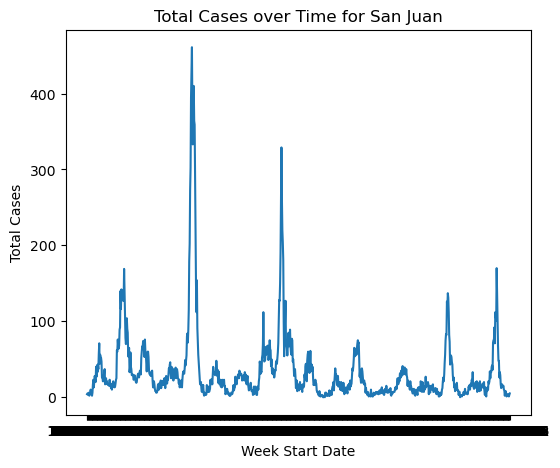

In [35]:
plt.plot(sj_df['week_start_date'], sj_df['total_cases'])
plt.title('Total Cases over Time for San Juan')
plt.xlabel('Week Start Date')
plt.ylabel('Total Cases')
plt.show()

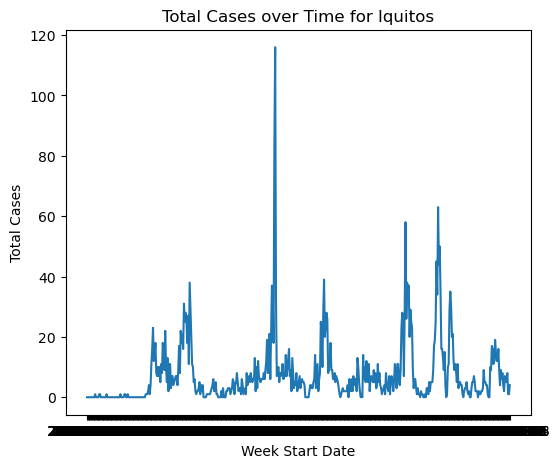

In [36]:
plt.plot(iq_df['week_start_date'], iq_df['total_cases'])
plt.title('Total Cases over Time for Iquitos')
plt.xlabel('Week Start Date')
plt.ylabel('Total Cases')
plt.show()






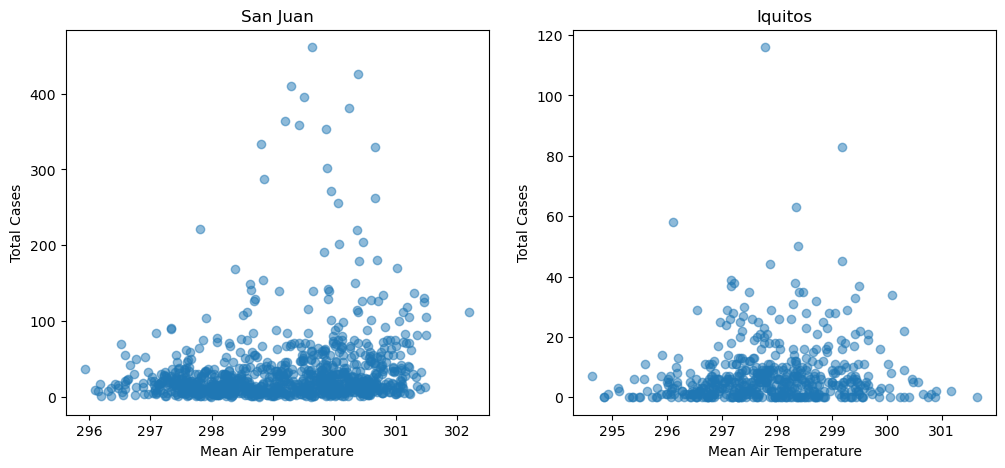

In [37]:
#Scatter plot of mean air temperature vs. total cases, for each city separately
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

sj = train_df[train_df['city'] == 'sj']
iq = train_df[train_df['city'] == 'iq']

axs[0].scatter(sj['mean_air_temperature'], sj['total_cases'], alpha=0.5)
axs[0].set_title('San Juan')
axs[0].set_xlabel('Mean Air Temperature')
axs[0].set_ylabel('Total Cases')

axs[1].scatter(iq['mean_air_temperature'], iq['total_cases'], alpha=0.5)
axs[1].set_title('Iquitos')
axs[1].set_xlabel('Mean Air Temperature')
axs[1].set_ylabel('Total Cases')

plt.show()

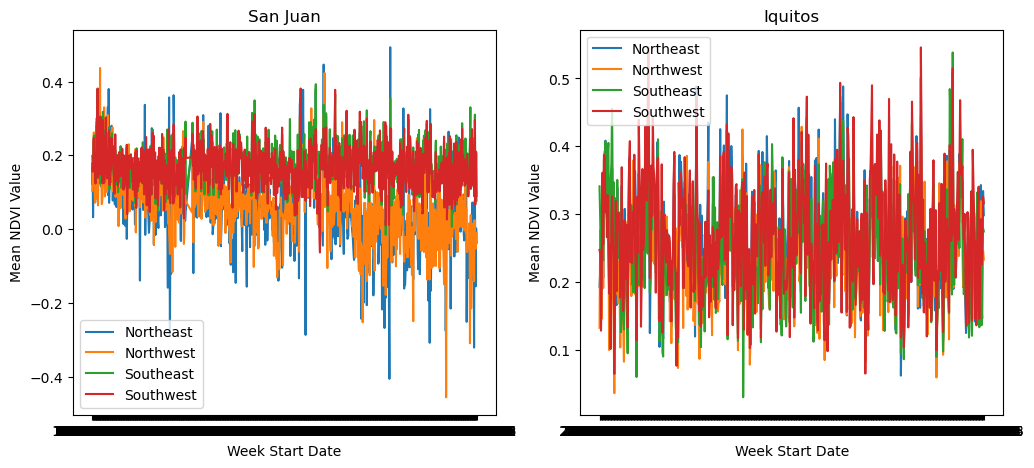

In [38]:
#Line chart of mean NDVI values over time, for each city separately
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))

sns.lineplot(x='week_start_date', y='northeast_of_city_centroid', data=sj, ax=axs[0], label='Northeast')
sns.lineplot(x='week_start_date', y='northwest_of_city_centroid', data=sj, ax=axs[0], label='Northwest')
sns.lineplot(x='week_start_date', y='southeast_of_city_centroid', data=sj, ax=axs[0], label='Southeast')
sns.lineplot(x='week_start_date', y='southwest_of_city_centroid', data=sj, ax=axs[0], label='Southwest')

axs[0].set_title('San Juan')
axs[0].set_xlabel('Week Start Date')
axs[0].set_ylabel('Mean NDVI Value')

sns.lineplot(x='week_start_date', y='northeast_of_city_centroid', data=iq, ax=axs[1], label='Northeast')
sns.lineplot(x='week_start_date', y='northwest_of_city_centroid', data=iq, ax=axs[1], label='Northwest')
sns.lineplot(x='week_start_date', y='southeast_of_city_centroid', data=iq, ax=axs[1], label='Southeast')
sns.lineplot(x='week_start_date', y='southwest_of_city_centroid', data=iq, ax=axs[1], label='Southwest')

axs[1].set_title('Iquitos')
axs[1].set_xlabel('Week Start Date')
axs[1].set_ylabel('Mean NDVI Value')

plt.show()

In [39]:
sj_df['week_start_date'] = pd.to_datetime(sj_df['week_start_date'])
sj_df = sj_df.set_index('week_start_date')


In [40]:
sj_df.head()

,city,year,week_of_year,northeast_of_city_centroid,northwest_of_city_centroid,southeast_of_city_centroid,southwest_of_city_centroid,Persian_total_precipitation,mean_air_temperature,reanalysis_avg_temp_k,...,mean_relative_humidity,Noaa_total_precipitation_per_mm,mean_specific_humidity,diurnal_temp_range,average_temp,diurnal_temp_range,maximum_temp,minimum_temp,total_precipitation_weather_station,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [41]:
iq_df['week_start_date'] = pd.to_datetime(iq_df['week_start_date'])
iq_df.set_index('week_start_date', inplace=True)

In [42]:
iq_df.head()

,city,year,week_of_year,northeast_of_city_centroid,northwest_of_city_centroid,southeast_of_city_centroid,southwest_of_city_centroid,Persian_total_precipitation,mean_air_temperature,reanalysis_avg_temp_k,...,mean_relative_humidity,Noaa_total_precipitation_per_mm,mean_specific_humidity,diurnal_temp_range,average_temp,diurnal_temp_range,maximum_temp,minimum_temp,total_precipitation_weather_station,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
2000-07-01,iq,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
2000-07-08,iq,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2000-07-15,iq,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
2000-07-22,iq,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
2000-07-29,iq,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [43]:
import statsmodels.api as sm

# Fit ARIMA model to sj_df
model_sj = sm.tsa.ARIMA(sj_df['total_cases'], order=(2, 1, 0))
results_sj = model_sj.fit()

# Fit ARIMA model to iq_df
model_iq = sm.tsa.ARIMA(iq_df['total_cases'], order=(2, 1, 0))
results_iq = model_iq.fit()


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

In [44]:

from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(endog=sj_df['total_cases'], order=(2, 1, 2))

# Fit the model to the data
results_sj = model.fit()

# Define the ARIMA model
model = ARIMA(endog=iq_df['total_cases'], order=(2, 1, 2))

# Fit the model to the data
results_iq = model.fit()

# Create a forecast for the next 26 weeks (6 months) for San Juan
forecast_sj = results_sj.forecast(steps=26)

# Create a forecast for the next 26 weeks (6 months) for Iquitos
forecast_iq = results_iq.forecast(steps=26)

# Print the forecasts
print(forecast_sj)
print(forecast_iq)


936    5.491145
937    5.529171
938    5.861095
939    5.790500
940    6.043005
941    5.919787
942    6.132223
943    5.983977
944    6.175752
945    6.016071
946    6.196761
947    6.032339
948    6.206674
949    6.040800
950    6.211122
951    6.045408
952    6.212880
953    6.048113
954    6.213316
955    6.049874
956    6.213105
957    6.051166
958    6.212579
959    6.052222
960    6.211903
961    6.053157
Name: predicted_mean, dtype: float64
520    3.566468
521    2.531547
522    2.704983
523    3.137829
524    3.068580
525    2.887569
526    2.915160
527    2.990847
528    2.979879
529    2.948236
530    2.952585
531    2.965813
532    2.964093
533    2.958564
534    2.959242
535    2.961553
536    2.961286
537    2.960321
538    2.960425
539    2.960828
540    2.960788
541    2.960619
542    2.960635
543    2.960705
544    2.960699
545    2.960670
Name: predicted_mean, dtype: float64


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated 

In [45]:
sj_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 1990-04-30 to 2008-04-22
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   city                                 936 non-null    object 
 1   year                                 936 non-null    int64  
 2   week_of_year                         936 non-null    int64  
 3   northeast_of_city_centroid           745 non-null    float64
 4   northwest_of_city_centroid           887 non-null    float64
 5   southeast_of_city_centroid           917 non-null    float64
 6   southwest_of_city_centroid           917 non-null    float64
 7   Persian_total_precipitation          927 non-null    float64
 8   mean_air_temperature                 930 non-null    float64
 9   reanalysis_avg_temp_k                930 non-null    float64
 10  reanalysis_dew_point_temp_k          930 non-null    float64
 11  reanalysis_ma

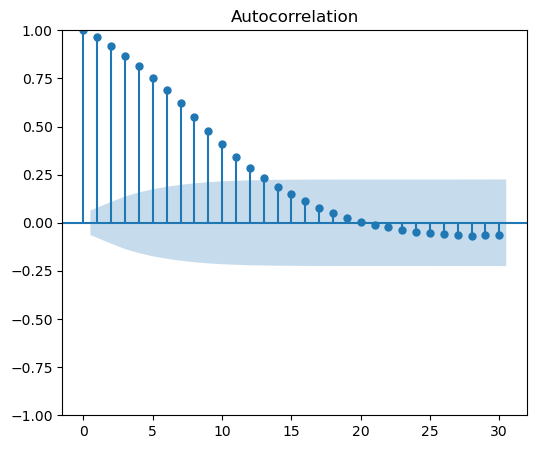

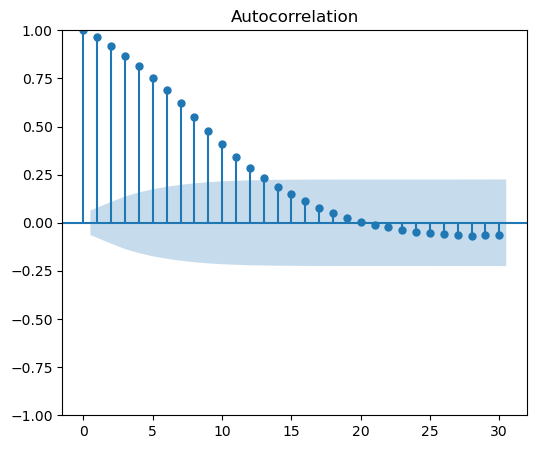

In [46]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of total_cases
plot_acf(sj_df['total_cases'])


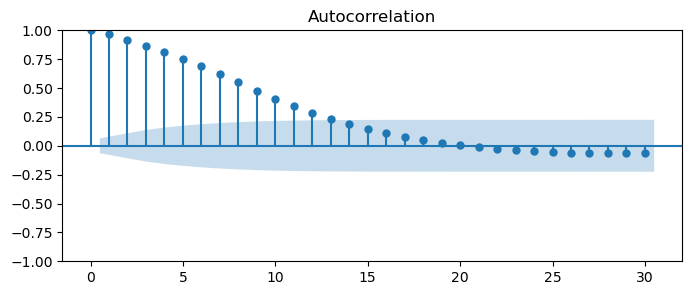

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot ACF of total_cases
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(sj_df['total_cases'], ax=ax)
plt.show()


In [48]:
from statsmodels.tsa.stattools import adfuller

# ADF test on total_cases
result = adfuller(sj_df['total_cases'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



ADF Statistic: -6.650078
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


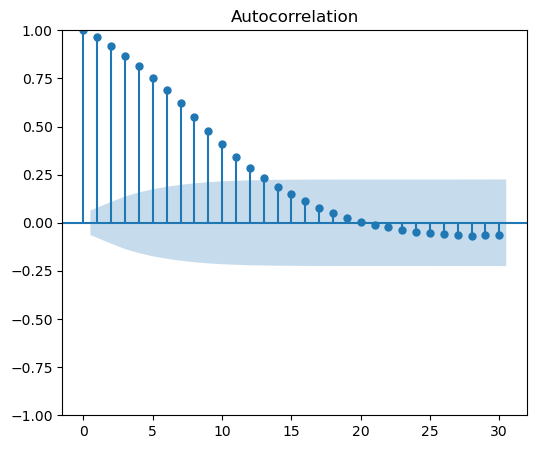

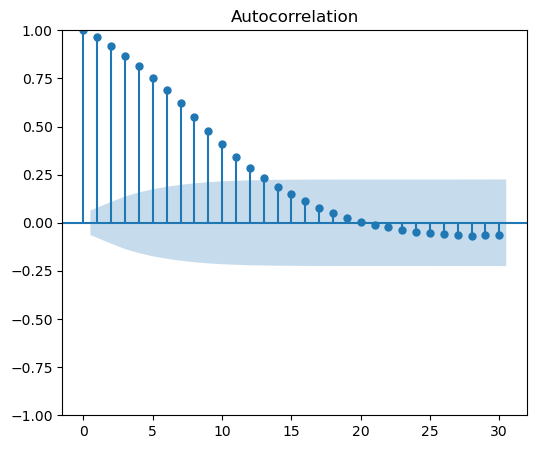

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of total_cases
plot_acf(sj_df['total_cases'])



In [50]:
##Based on the output of the Augmented Dickey-Fuller (ADF) test you provided, the ADF statistic is -6.650078 and the p-value is 0.000000. Since the p-value is less than 0.05 (assuming a significance level of 5%), we can reject the null hypothesis that the time series is non-stationary, and conclude that the time series is stationary.

#Therefore, in this case, the time series is stationary.

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train = sj_df.loc['1990-04-30':'2003-04-22']
test = sj_df.loc['2003-04-29':'2008-04-22']

# Fit an ARIMA model to the training set
model = ARIMA(train['total_cases'], order=(2,1,2))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.forecast(len(test))

# Print the predictions
print(predictions)


675    8.341248
676    8.560735
677    8.728664
678    8.672719
679    8.746466
         ...   
930    8.716156
931    8.716156
932    8.716156
933    8.716156
934    8.716156
Name: predicted_mean, Length: 260, dtype: float64


/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gligorcovasilev/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will 

In [52]:
#The predicted_mean values show the forecasted values of the total_cases variable for the next 260 periods (or days), based on the ARIMA model we have fitted. These values can be used to make future predictions of the total_cases variable.

In [53]:
# Calculate mean absolute error (MAE)
mae = mean_absolute_error(test['total_cases'], predictions)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(test['total_cases'], predictions, squared=False)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(np.abs(predictions - test['total_cases'])/np.abs(test['total_cases'])) * 100

# Print the evaluation metrics
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))
print('Mean Absolute Percentage Error (MAPE): {:.2f}%'.format(mape))


NameError: name 'mean_absolute_error' is not defined

In [113]:
# Check for missing values
print(sj_df.isnull().sum())

# Forward fill missing values
sj_df = sj_df.fillna(method='ffill')


city                                     0
year                                     0
week_of_year                             0
northeast_of_city_centroid             191
northwest_of_city_centroid              49
southeast_of_city_centroid              19
southwest_of_city_centroid              19
Persian_total_precipitation              9
mean_air_temperature                     6
reanalysis_avg_temp_k                    6
reanalysis_dew_point_temp_k              6
reanalysis_max_air_temp_k                6
reanalysis_min_air_temp_k                6
reanalysis_precip_amt_kg_per_m2          6
mean_relative_humidity                   6
Noaa_total_precipitation_per_mm          9
mean_specific_humidity                   6
diurnal_temp_range                       6
average_temp                             6
diurnal_temp_range                       6
maximum_temp                             6
minimum_temp                             6
total_precipitation_weather_station      6
total_cases

In [114]:
print(sj_df.isnull().sum())


city                                   0
year                                   0
week_of_year                           0
northeast_of_city_centroid             0
northwest_of_city_centroid             0
southeast_of_city_centroid             0
southwest_of_city_centroid             0
Persian_total_precipitation            0
mean_air_temperature                   0
reanalysis_avg_temp_k                  0
reanalysis_dew_point_temp_k            0
reanalysis_max_air_temp_k              0
reanalysis_min_air_temp_k              0
reanalysis_precip_amt_kg_per_m2        0
mean_relative_humidity                 0
Noaa_total_precipitation_per_mm        0
mean_specific_humidity                 0
diurnal_temp_range                     0
average_temp                           0
diurnal_temp_range                     0
maximum_temp                           0
minimum_temp                           0
total_precipitation_weather_station    0
total_cases                            0
dtype: int64


In [127]:
sj_df = sj_df.groupby(level=0).mean()


In [128]:
# calculate IQR for each column
Q1 = sj_df.quantile(0.25)
Q3 = sj_df.quantile(0.75)
IQR = Q3 - Q1

# remove outliers
sj_df = sj_df[~((sj_df < (Q1 - 1.5 * IQR)) | (sj_df > (Q3 + 1.5 * IQR))).any(axis=1)]


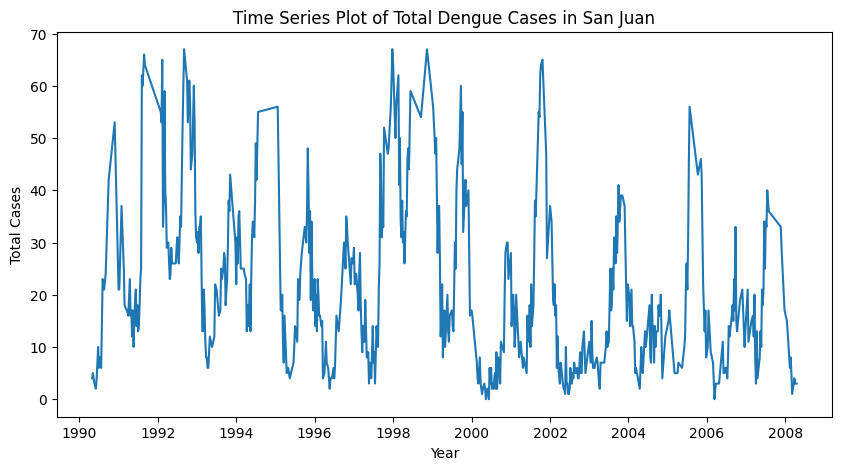

ValueError: ignored

In [129]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a time series plot
plt.figure(figsize=(10,5))
plt.plot(sj_df['total_cases'])
plt.title('Time Series Plot of Total Dengue Cases in San Juan')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

# Perform decomposition analysis
decomposition = seasonal_decompose(sj_df['total_cases'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(sj_df['total_cases'], label='Original', alpha=0.5)
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', alpha=0.5)
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', alpha=0.5)
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', alpha=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


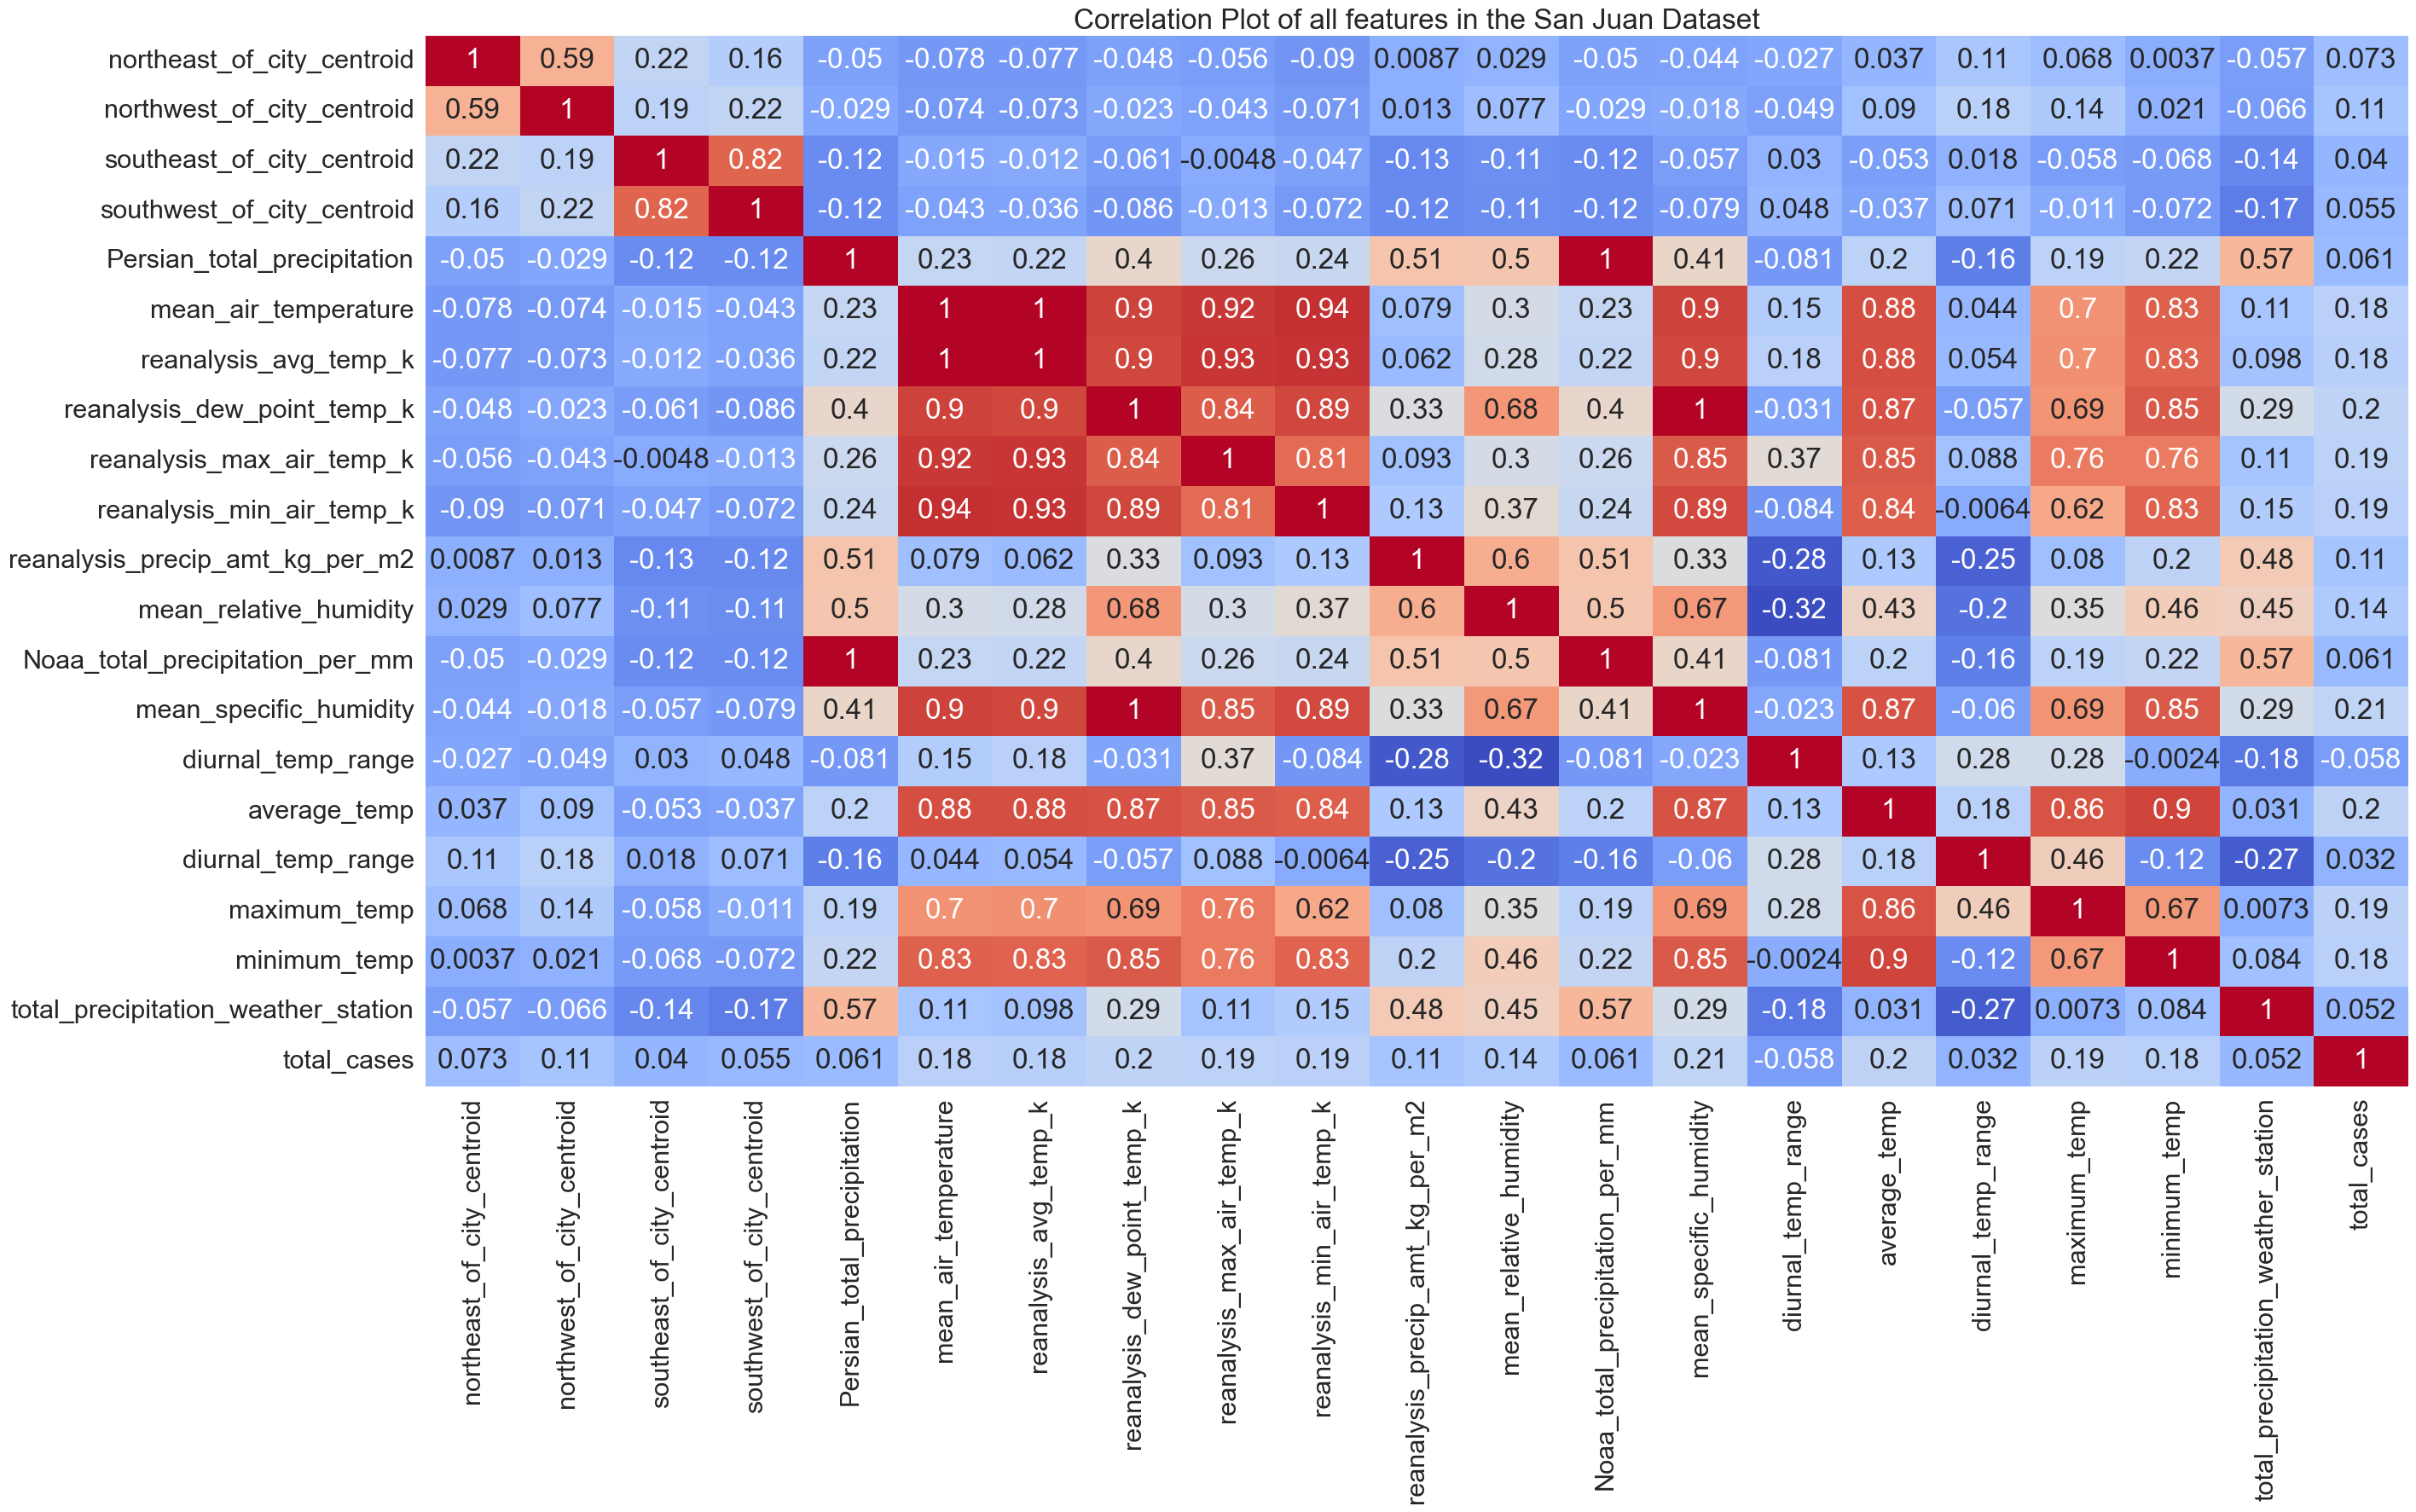

In [ ]:
sj_corr = df_sj.corr()

sns.set(font_scale = 2)
plt.figure(figsize=(30, 16))

sns.heatmap(sj_corr, annot=True, cmap="coolwarm", cbar=False)
plt.title('Correlation Plot of all features in the San Juan Dataset')
plt.show()

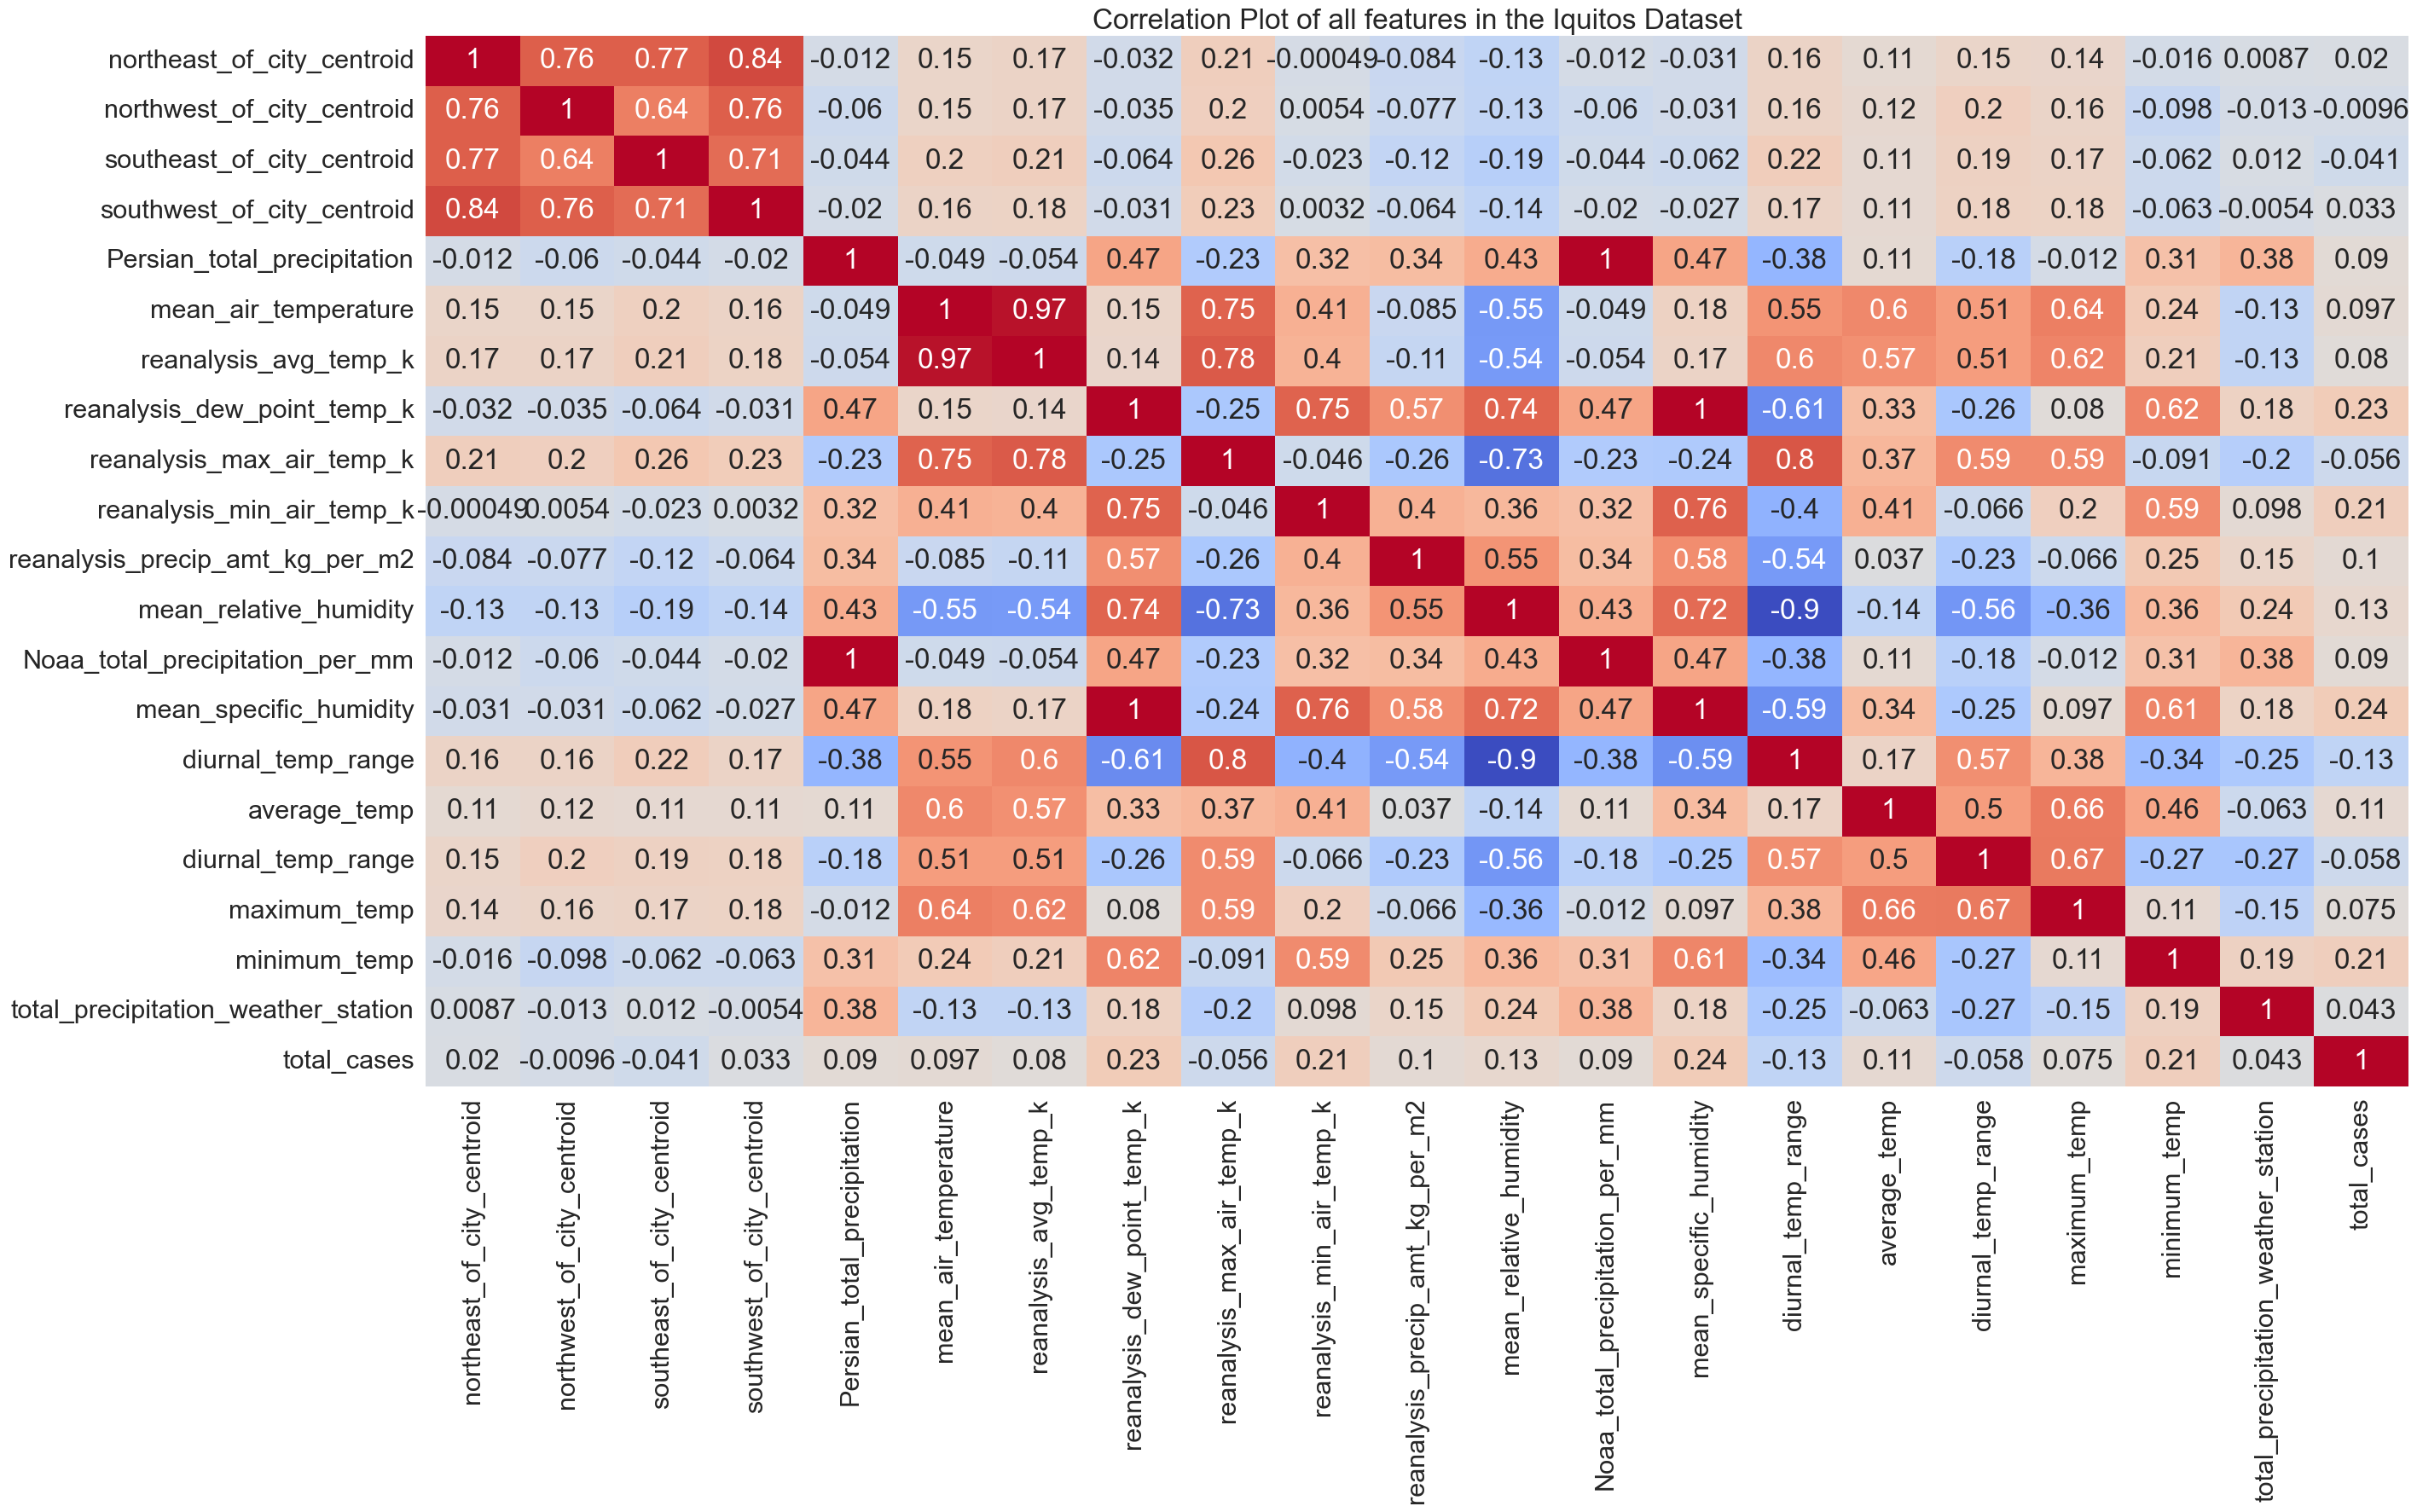

In [ ]:
iq_corr = df_iq.corr()

sns.set(font_scale = 2)
plt.figure(figsize=(30, 16))

sns.heatmap(iq_corr, annot=True, cmap="coolwarm", cbar=False)
plt.title('Correlation Plot of all features in the Iquitos Dataset')
plt.show()

there is no variables good at predicting the total cases in both cities

most of the temperatures related variables are highly corelated between each other
